# Data Cleaning, EDA & Data Visualization

### Preliminary EDA

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Read the data
ames = pd.read_csv('../datasets/train.csv', na_values=[''], keep_default_na=False)

In [3]:
# Rename the columns
ames.columns = [column.lower().replace(' ','_') for column in ames.columns]
ames.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000


In [4]:
# Shape of dataset
ames.shape

(2051, 81)

In [5]:
# Ames datatypes
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

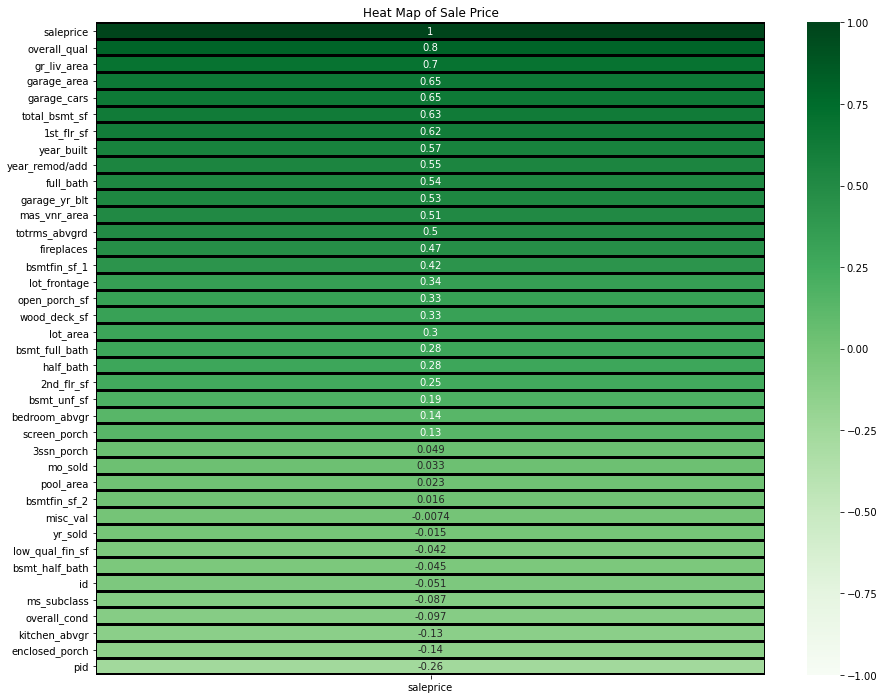

In [6]:
# Initial heat map of 'saleprice'
plt.figure(figsize=(15,12))
plt.title('Heat Map of Sale Price')
sns.heatmap(ames.corr()[['saleprice']].sort_values(by='saleprice',ascending=False),cmap='Greens',vmin=-1,vmax=1,annot=True,linecolor='black',linewidths=2);

In [7]:
# Columns sorted by # of missing values (20 columns with missing values)
ames.isnull().sum().sort_values(ascending=False).head(20)

lot_frontage      330
garage_yr_blt     114
mas_vnr_type       22
mas_vnr_area       22
bsmt_exposure       4
bsmtfin_type_2      2
bsmt_half_bath      2
bsmt_full_bath      2
garage_cond         1
bsmt_cond           1
bsmtfin_type_1      1
garage_finish       1
garage_cars         1
garage_area         1
bsmtfin_sf_2        1
garage_qual         1
bsmtfin_sf_1        1
bsmt_qual           1
total_bsmt_sf       1
bsmt_unf_sf         1
dtype: int64

### Data Cleaning

#### Missing values
Drop all rows of columns with fewer than 5 missing values since these missing values represent less than 1% of the dataset. For columns with more than 5 missing values, impute the missing data with the most reasonable value.

In [8]:
# Drop all rows where missing values < 5 (rationale: < 1% of dataset)
for column in ames.columns:
    if ames[column].isnull().sum() in range(1,5):
        subset = ames.loc[ames[column].isnull()]
        ames.drop(index=subset.index,inplace=True)

In [9]:
# Check execution - 4 columns with missing values remain
ames.isnull().sum().sort_values(ascending=False).head(4)

lot_frontage     330
garage_yr_blt    113
mas_vnr_type      22
mas_vnr_area      22
dtype: int64

In [10]:
# 'lot_frontage' column check (continuous)
print(sorted(ames['lot_frontage'].unique()))
print(ames['lot_frontage'].dtypes)
print(ames['lot_frontage'].isnull().sum())

[nan, 21.0, 22.0, 24.0, 25.0, 26.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 124.0, 125.0, 128.0, 129.0, 130.0, 134.0, 135.0, 137.0, 138.0, 140.0, 141.0, 144.0, 150.0, 153.0, 155.0, 160.0, 174.0, 195.0, 200.0, 313.0]
float64
330


In [11]:
# Impute null values with 0.0
ames['lot_frontage'].fillna(0.0,inplace=True)

# Check code execution
ames['lot_frontage'].isnull().sum()

0

In [12]:
# 'garage_yr_blt' column check (discrete)
print(sorted(ames['garage_yr_blt'].unique()))
print(ames['garage_yr_blt'].dtypes)
print(ames['garage_yr_blt'].isnull().sum())

[1900.0, 1916.0, 1920.0, 1924.0, 1930.0, 1931.0, 1935.0, 1937.0, 1939.0, 1949.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1963.0, 1964.0, 1965.0, 1966.0, 1968.0, 1969.0, 1971.0, 1972.0, 1973.0, 1976.0, 1977.0, 1978.0, 1979.0, 1981.0, 1986.0, 1992.0, 1994.0, 1995.0, 1996.0, 1997.0, 1999.0, 2000.0, 2001.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2009.0, nan, 1895.0, 1896.0, 1910.0, 1914.0, 1915.0, 1917.0, 1918.0, 1919.0, 1921.0, 1922.0, 1923.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1932.0, 1933.0, 1934.0, 1936.0, 1938.0, 1940.0, 1941.0, 1942.0, 1945.0, 1946.0, 1947.0, 1948.0, 1950.0, 1962.0, 1967.0, 1970.0, 1974.0, 1975.0, 1980.0, 1982.0, 1983.0, 1984.0, 1985.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1993.0, 1998.0, 2002.0, 2008.0, 2010.0, 2207.0]
float64
113


In [13]:
# Impute null values with 'year_built' value
ames['garage_yr_blt'].fillna(ames['year_built'],inplace=True)

# Check code execution
ames['garage_yr_blt'].isnull().sum()

0

In [14]:
# 'mas_vnr_type' column check (nominal)
print(ames['mas_vnr_type'].unique())
print(ames['mas_vnr_type'].dtypes)
print(ames['mas_vnr_type'].isnull().sum())

['BrkFace' 'None' nan 'Stone' 'BrkCmn']
object
22


In [15]:
# Impute null values with 'None'
ames['mas_vnr_type'].fillna('None',inplace=True)

# Check code execution
ames['mas_vnr_type'].isnull().sum()

0

In [16]:
# 'mas_vnr_area' column check (continuous)
print(sorted(ames['mas_vnr_area'].unique()))
print(ames['mas_vnr_area'].dtypes)
print(ames['mas_vnr_area'].isnull().sum())

[0.0, 3.0, 16.0, 18.0, 23.0, 24.0, 30.0, 36.0, 39.0, 40.0, 41.0, 50.0, 51.0, 52.0, 54.0, 56.0, 57.0, 58.0, 60.0, 64.0, 65.0, 72.0, 74.0, 82.0, 84.0, 85.0, 86.0, 90.0, 94.0, 95.0, 96.0, 97.0, 99.0, 100.0, 104.0, 105.0, 106.0, 108.0, 110.0, 113.0, 115.0, 116.0, 117.0, 120.0, 125.0, 128.0, 132.0, 135.0, 136.0, 138.0, 140.0, 143.0, 144.0, 145.0, 148.0, 149.0, 150.0, 157.0, 160.0, 162.0, 164.0, 165.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 174.0, 176.0, 178.0, 179.0, 180.0, 182.0, 183.0, 184.0, 189.0, 192.0, 198.0, 200.0, 202.0, 203.0, 205.0, 206.0, 208.0, 210.0, 212.0, 216.0, 219.0, 221.0, 222.0, 224.0, 227.0, 228.0, 230.0, 232.0, 234.0, 236.0, 238.0, 239.0, 240.0, 242.0, 245.0, 252.0, 253.0, 256.0, 260.0, 261.0, 268.0, 270.0, 272.0, 274.0, 275.0, 280.0, 283.0, 288.0, 289.0, 298.0, 302.0, 309.0, 324.0, 327.0, 332.0, 337.0, 340.0, 350.0, 351.0, 359.0, 360.0, 365.0, 368.0, 376.0, 412.0, 420.0, 422.0, 425.0, 428.0, 452.0, 456.0, nan, 1.0, 14.0, 20.0, 22.0, 27.0, 28.0, 31.0, 32.0, 38.0, 42.

In [17]:
# Impute null values with 0.0
ames['mas_vnr_area'].fillna(0.0,inplace=True)

# Check code execution
ames['mas_vnr_area'].isnull().sum()

0

In [18]:
# Final check of missing values
ames.isnull().sum().sort_values(ascending=False).head()

saleprice         0
total_bsmt_sf     0
year_remod/add    0
roof_style        0
roof_matl         0
dtype: int64

>All missing values have been cleaned up.

#### Outliers

In [19]:
# Summary statistics of all numeric columns
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2044.0,1.474108e+03,8.438467e+02,1.0,7.537500e+02,1483.5,2.197500e+03,2930.0
pid,2044.0,7.134830e+08,1.886870e+08,526301100.0,5.284582e+08,535453180.0,9.071770e+08,924152030.0
ms_subclass,2044.0,5.707192e+01,4.286515e+01,20.0,2.000000e+01,50.0,7.000000e+01,190.0
lot_frontage,2044.0,5.786106e+01,3.313845e+01,0.0,4.300000e+01,63.0,7.800000e+01,313.0
lot_area,2044.0,1.004779e+04,6.703089e+03,1300.0,7.500000e+03,9417.5,1.151275e+04,159000.0
overall_qual,2044.0,6.112524e+00,1.425953e+00,1.0,5.000000e+00,6.0,7.000000e+00,10.0
overall_cond,2044.0,5.561644e+00,1.105150e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.0
year_built,2044.0,1.971688e+03,3.016920e+01,1872.0,1.953750e+03,1974.0,2.001000e+03,2010.0
year_remod/add,2044.0,1.984154e+03,2.103464e+01,1950.0,1.964000e+03,1993.0,2.004000e+03,2010.0
mas_vnr_area,2044.0,9.863845e+01,1.744883e+02,0.0,0.000000e+00,0.0,1.585000e+02,1600.0


In [20]:
# Max value for 'garage_yr_blt' doesn't make sense
ames['garage_yr_blt'].sort_values(ascending=False).head(3)

1699    2207.0
144     2010.0
1241    2010.0
Name: garage_yr_blt, dtype: float64

In [21]:
# Remove max value for 'garage_yr_blt' (1 row removed)
subset1 = ames.loc[ames['garage_yr_blt']==2207.0]
ames.drop(index=subset1.index,inplace=True)

# Check code execution
ames['garage_yr_blt'].sort_values(ascending=False).head(3)

1241    2010.0
144     2010.0
1060    2009.0
Name: garage_yr_blt, dtype: float64

>An outlier is technically any value where the scaled z score is greater than 3 or less than -3. Besides values that don't make any sense (as seen in the 'garage_yr_blt' example), I will keep outliers in the data so that my model can learn how to generalize well against new data and be more robust against potential outliers in unseen data.

>Outliers can be identified using the syntax below. As mentioned above, I will not be removing outliers to construct a conservative model.

>Code for identifying outliers: df.loc[stats.zscore(df['column_name'])>3][['column_name']]
<br>Referenced: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

#### Data Type Conversions

In [22]:
# Convert dtypes (could not automate the process due to differences in data values)

# 'pid' (int to nominal)
ames['pid'] = ames['pid'].astype(str)

# 'ms_subclass' (int to nominal)
ames['ms_subclass'] = ames['ms_subclass'].astype(str)

# 'lot_shape' (object to ordinal)
lot_shape_dict = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
ames['lot_shape'] = ames['lot_shape'].map(lot_shape_dict)

# 'utilities' (object to ordinal)
utilities_dict = {'ELO': 1,'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}
ames['utilities'] = ames['utilities'].map(utilities_dict)

# 'land_slope' (object to ordinal)
land_slope_dict = {'Sev': 1, 'Mod': 2, 'Gtl': 3}
ames['land_slope'] = ames['land_slope'].map(land_slope_dict)

# 'exter_qual' (object to ordinal)
exter_qual_dict = {'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ames['exter_qual'] = ames['exter_qual'].map(exter_qual_dict)

# 'exter_cond' (object to ordinal)
exter_cond_dict = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ames['exter_cond'] = ames['exter_cond'].map(exter_cond_dict)

# 'bsmt_qual' (object to ordinal)
bsmt_qual_dict = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ames['bsmt_qual'] = ames['bsmt_qual'].map(bsmt_qual_dict)

# 'bsmt_cond' (object to ordinal)
bsmt_cond_dict = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ames['bsmt_cond'] = ames['bsmt_cond'].map(bsmt_cond_dict)

# 'bsmt_exposure' (object to ordinal)
bsmt_exposure_dict = {'NA': 0, 'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3}
ames['bsmt_exposure'] = ames['bsmt_exposure'].map(bsmt_exposure_dict)

# 'bsmtfin_type_1' (object to ordinal)
bsmtfin_type_1_dict = {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
ames['bsmtfin_type_1'] = ames['bsmtfin_type_1'].map(bsmtfin_type_1_dict)

# 'bsmtfin_type_2' (object to ordinal)
bsmtfin_type_2_dict = {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
ames['bsmtfin_type_2'] = ames['bsmtfin_type_2'].map(bsmtfin_type_2_dict)

# 'heating_qc' (object to ordinal)
heating_qc_dict = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ames['heating_qc'] = ames['heating_qc'].map(heating_qc_dict)

# 'electrical' (object to ordinal)
electrical_dict = {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA':4, 'SBrkr':5}
ames['electrical'] = ames['electrical'].map(electrical_dict)

# 'kitchen_qual' (object to ordinal)
kitchen_qual_dict = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
ames['kitchen_qual'] = ames['kitchen_qual'].map(kitchen_qual_dict)

# 'functional' (object to ordinal)
functional_dict = {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8}
ames['functional'] = ames['functional'].map(functional_dict)

# 'fireplace_qu' (object to ordinal)
fireplace_qu_dict = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ames['fireplace_qu'] = ames['fireplace_qu'].map(fireplace_qu_dict)

# 'garage_finish' (object to ordinal)
garage_finish_dict = {'NA':0,'Unf':1,'RFn':2,'Fin':3}
ames['garage_finish'] = ames['garage_finish'].map(garage_finish_dict)

# 'garage_qual' (object to ordinal)
garage_qual_dict = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ames['garage_qual'] = ames['garage_qual'].map(garage_qual_dict)

# 'garage_cond' (object to ordinal)
garage_cond_dict = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ames['garage_cond'] = ames['garage_cond'].map(garage_cond_dict)

# 'paved_drive' (object to ordinal)
paved_drive_dict = {'N':0,'P':1,'Y':2}
ames['paved_drive'] = ames['paved_drive'].map(paved_drive_dict)

# 'pool_qc' (object to ordinal)
pool_qc_dict = {'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
ames['pool_qc'] = ames['pool_qc'].map(pool_qc_dict)

# 'fence' (object to ordinal)
fence_dict = {'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
ames['fence'] = ames['fence'].map(fence_dict)

In [23]:
# 'neighborhood' (object to ordinal)
# Create 4 groups for neighborhood based on sale price quartiles
# Received help from Melody Wu
ames['neighborhood'].dtypes, ames['neighborhood'].unique()

(dtype('O'),
 array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
        'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
        'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
        'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
        'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object))

In [24]:
# Breakdown of quartiles for 'saleprice'
ames[['saleprice']].describe().T

,count,mean,std,min,25%,50%,75%,max
saleprice,2043.0,181352.099853,79282.118201,12789.0,129650.0,162000.0,214000.0,611657.0


In [25]:
# Map 'neighborhood' based on 'saleprice' quartiles
# Create a new column 'mod_neighborhood'
neighborhood_dict = {'MeadowV': 1, 'IDOTRR': 1, 'BrDale': 1, 'OldTown': 1, 'BrkSide': 1, 'Edwards': 1, 
                     'SWISU': 2, 'Landmrk': 2, 'Sawyer': 2, 'NPkVill': 2, 'Blueste': 2, 'NAmes': 2, 
                     'Mitchel': 3, 'SawyerW': 3, 'Greens': 3, 'Gilbert': 3, 'NWAmes': 3, 'Blmngtn': 3, 'CollgCr': 3, 'Crawfor': 3, 
                     'StoneBr': 4, 'NridgHt': 4, 'NoRidge': 4, 'GrnHill': 4, 'Veenker': 4, 'Timber': 4, 'Somerst': 4, 'ClearCr': 4}
ames['mod_neighborhood'] = ames['neighborhood'].map(neighborhood_dict)
ames['mod_neighborhood'].dtypes, ames['mod_neighborhood'].unique()

(dtype('int64'), array([2, 3, 4, 1]))

In [26]:
# 'saleprice' by 'neighborhood'
ames.groupby(by='neighborhood')[['saleprice']].mean().sort_values(by='saleprice',ascending=False)

,saleprice
neighborhood,
StoneBr,329675.736842
NridgHt,323152.272727
NoRidge,316294.125000
GrnHill,280000.000000
Veenker,253570.588235
Timber,240492.872340
Somerst,227346.078125
ClearCr,217490.074074
Crawfor,205901.211268


>All incorrect dtypes have been converted.

### Exploratory Data Analysis (EDA)

In [27]:
# Summary statistics of 'saleprice'
ames[['saleprice']].describe().T

,count,mean,std,min,25%,50%,75%,max
saleprice,2043.0,181352.099853,79282.118201,12789.0,129650.0,162000.0,214000.0,611657.0


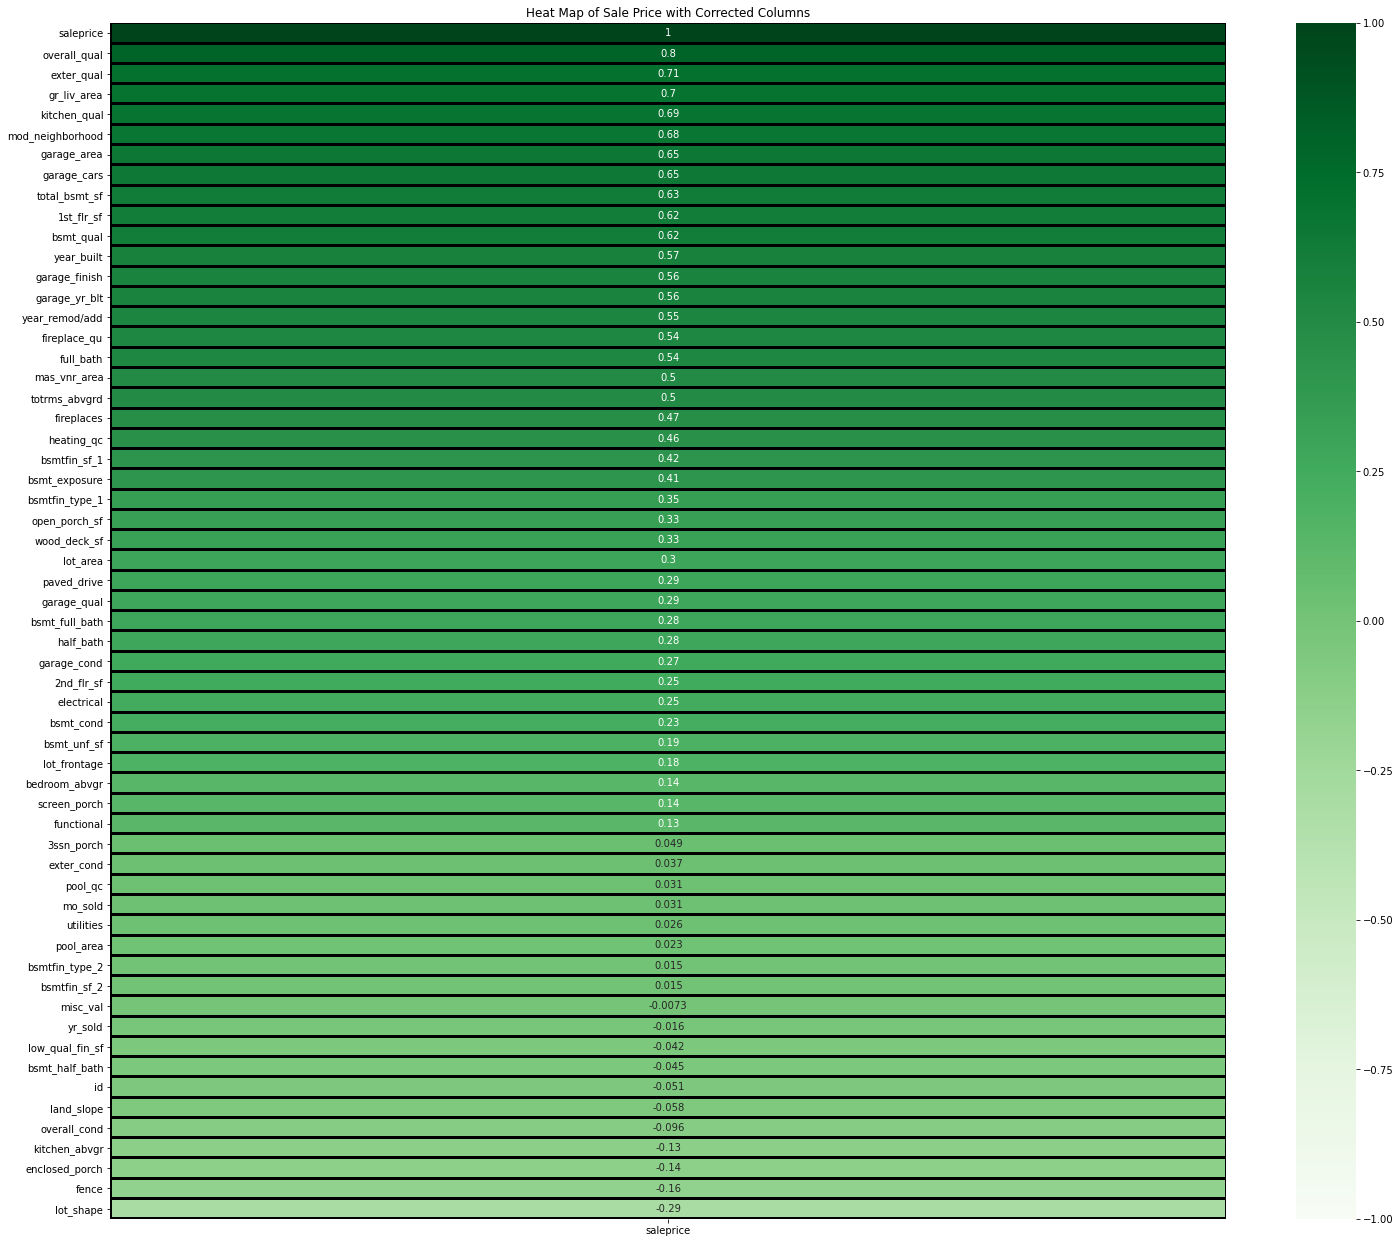

In [28]:
# Heat map of 'saleprice' with all columns corrected
plt.figure(figsize=(25,22))
plt.title('Heat Map of Sale Price with Corrected Columns')
sns.heatmap(ames.corr()[['saleprice']].sort_values(by='saleprice',ascending=False),cmap='Greens',vmin=-1,vmax=1,annot=True,linecolor='black',linewidths=2);

**Insights:** After cleaning the data, it appears that some of the ordinal variables, such as exter_qual, kitchen_qual, mod_neighborhood, and bsmt_qual, are highly correlated to sale price. Without proper data cleaning, these relationships would not have been apparent.

In [29]:
# Summary statistics of cleaned data
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2043.0,1473.722956,843.873570,1.0,753.5,1481.0,2196.0,2930.0
lot_frontage,2043.0,57.856094,33.145804,0.0,43.0,63.0,78.0,313.0
lot_area,2043.0,10048.643172,6704.618697,1300.0,7500.0,9430.0,11513.5,159000.0
lot_shape,2043.0,3.596672,0.566644,1.0,3.0,4.0,4.0,4.0
utilities,2043.0,3.998532,0.049461,2.0,4.0,4.0,4.0,4.0
land_slope,2043.0,2.947137,0.244720,1.0,3.0,3.0,3.0,3.0
overall_qual,2043.0,6.111601,1.425690,1.0,5.0,6.0,7.0,10.0
overall_cond,2043.0,5.561919,1.105351,1.0,5.0,5.0,6.0,9.0
year_built,2043.0,1971.671072,30.167026,1872.0,1953.5,1974.0,2001.0,2010.0
year_remod/add,2043.0,1984.142438,21.033711,1950.0,1964.0,1993.0,2004.0,2010.0


### Data Visualization

In [30]:
# Basic summary statistics of 'saleprice'
print('Mean: ', ames['saleprice'].mean())
print('Median: ', ames['saleprice'].median())
print('Std Dev: ', ames['saleprice'].std())

Mean:  181352.09985315712
Median:  162000.0
Std Dev:  79282.11820054475


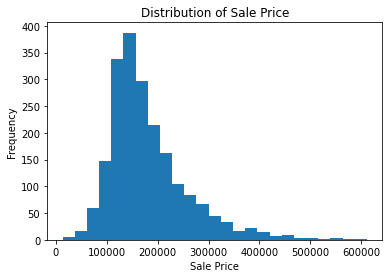

In [31]:
# Histogram of 'saleprice'
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.hist(x=ames['saleprice'],bins=25);

**Interpretation:** The data appears to be approximately normally distributed.

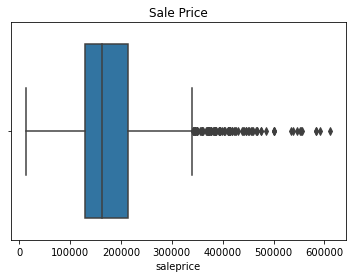

In [32]:
# Boxplot of 'saleprice'
plt.title('Sale Price')
sns.boxplot(x=ames['saleprice']);

**Interpretation:** The data seems to have a lot of outliers in the upper range.

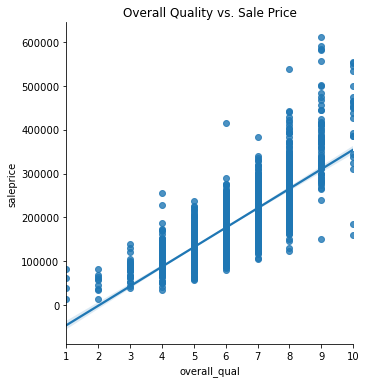

In [33]:
# Linear plot of 'overall_qual' vs. 'saleprice'
sns.lmplot(x='overall_qual',y='saleprice',data=ames)
plt.title('Overall Quality vs. Sale Price');

**Interpretation:** 'overall_qual' and 'saleprice' have a linear relationship.

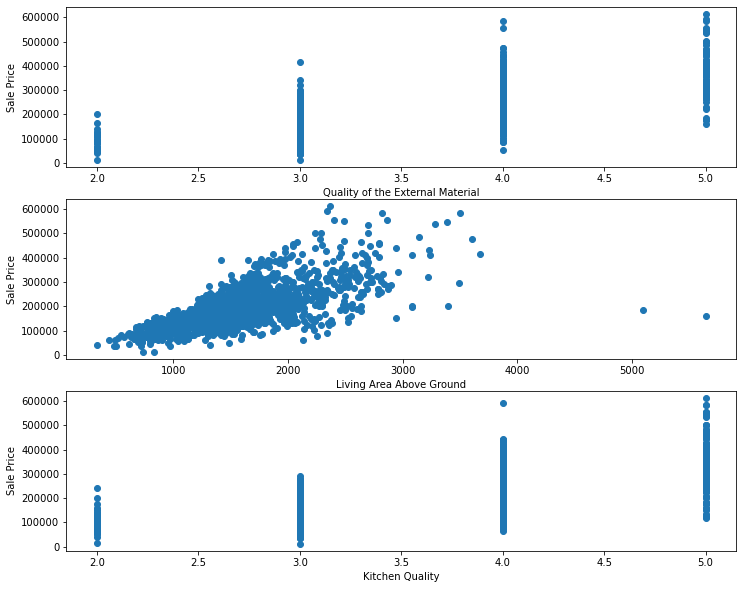

In [34]:
# Scatter plots of 3 highly correlated numerical features against sale price
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(12,10))

ax[0].scatter(x=ames['exter_qual'], y=ames['saleprice'])
ax[0].set_xlabel('Quality of the External Material')
ax[0].set_ylabel('Sale Price')

ax[1].scatter(x=ames['gr_liv_area'], y=ames['saleprice'])
ax[1].set_xlabel('Living Area Above Ground')
ax[1].set_ylabel('Sale Price')

ax[2].scatter(x=ames['kitchen_qual'], y=ames['saleprice'])
ax[2].set_xlabel('Kitchen Quality')
ax[2].set_ylabel('Sale Price');

**Interpretation:** The scatter plots show the relationships between sale price and three X features that are highly correlated to sale price.

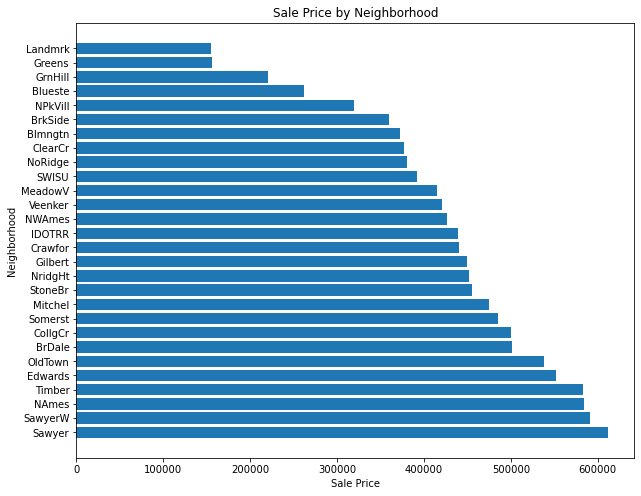

In [35]:
# Horizontal bar chart of 'saleprice' vs. 'neighborhood'
plt.figure(figsize=(10,8))
plt.title('Sale Price by Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Sale Price')
plt.barh(y=ames['neighborhood'],width=ames['saleprice'].sort_values(ascending=False));

**Interpretation:** The sale price appears to differ based on the neighborhood in which the house was sold. Neighborhood could be a good categorical variable to test in my model.

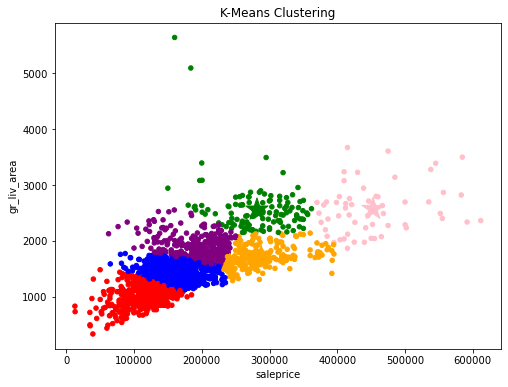

In [36]:
# K-Means Clustering
X = ames[['saleprice', 'gr_liv_area']]
ss = StandardScaler()
X_ss = ss.fit_transform(X)
km = KMeans(n_clusters=6, random_state=42)
km.fit(X_ss)
ames['cluster'] = km.labels_
centroids = pd.DataFrame(ss.inverse_transform(km.cluster_centers_),
                        columns=['saleprice', 'gr_liv_area'])

# Visualize clusters
colors = ['red', 'green', 'blue', 'pink', 'orange', 'purple']
ames['color'] = ames['cluster'].map(lambda x: colors[x])
ax = ames.plot(kind='scatter', x='saleprice', y='gr_liv_area',
              figsize=(8, 6), c=ames['color'])
centroids.plot(kind='scatter', x='saleprice', y='gr_liv_area',
              marker='*', c=colors, s=550, ax=ax)
plt.title('K-Means Clustering');

**Interpretation:** Utilizing k-means clustering to explore the relationship between sale price and above ground living area.

In [37]:
# Drop 'cluster' and 'color' columns
ames.drop(columns=['cluster', 'color'], inplace=True)

In [38]:
# Save dataframe as CSV file
ames.to_csv('../datasets/cleaned_data.csv', index=False)

#### Checkpoint

Based on the insights collected from data cleaning and EDA, it seems highly likely that I will be able to successfully address the problem statement. Cleaning the data has revealed associations for features that were previously not obvious.